In [1]:
import sklearn
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras

In [2]:
data = pd.read_csv("heart.csv")
print(data.shape)
data.head()

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


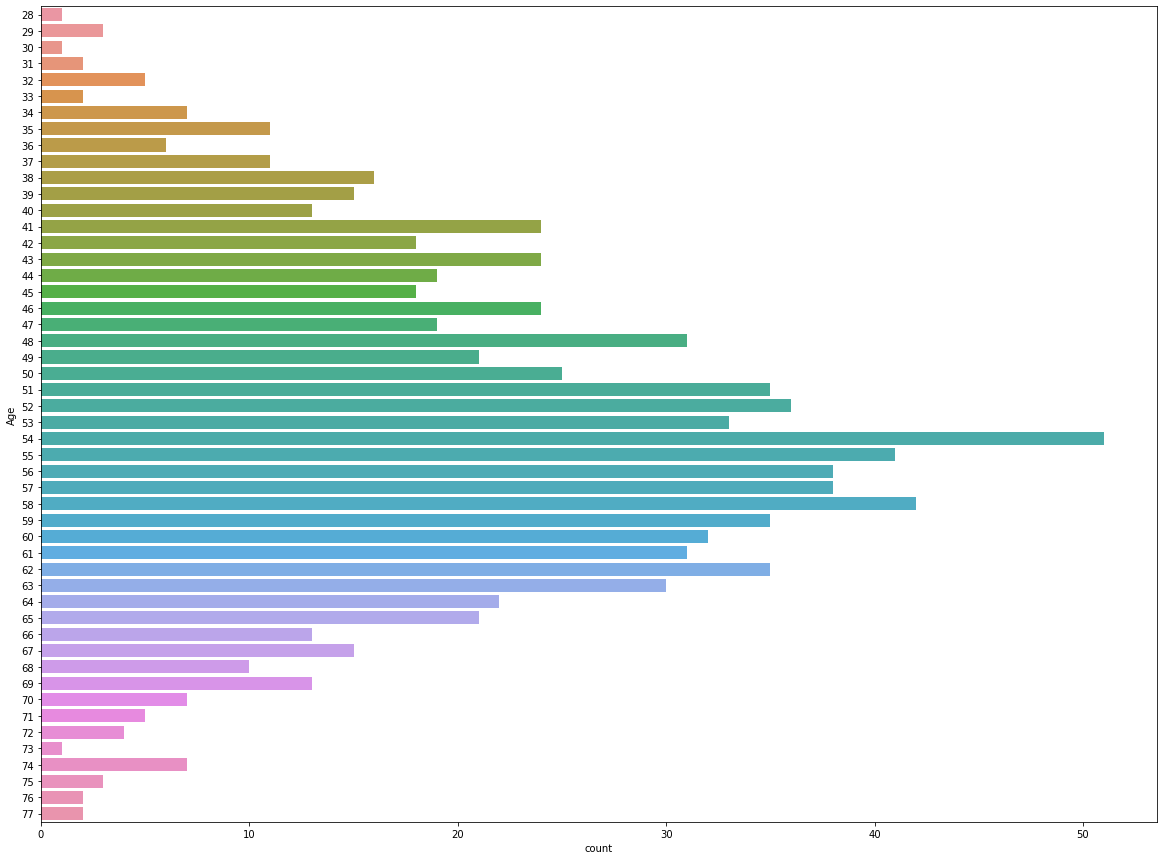

In [3]:
plt.figure(figsize = (20,15))
sns.countplot(y = data.Age)

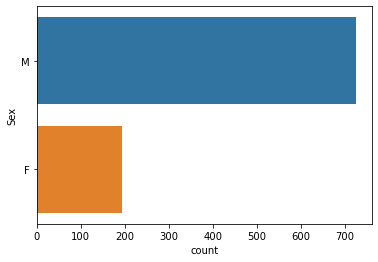

In [4]:
sns.countplot(y = data.Sex)

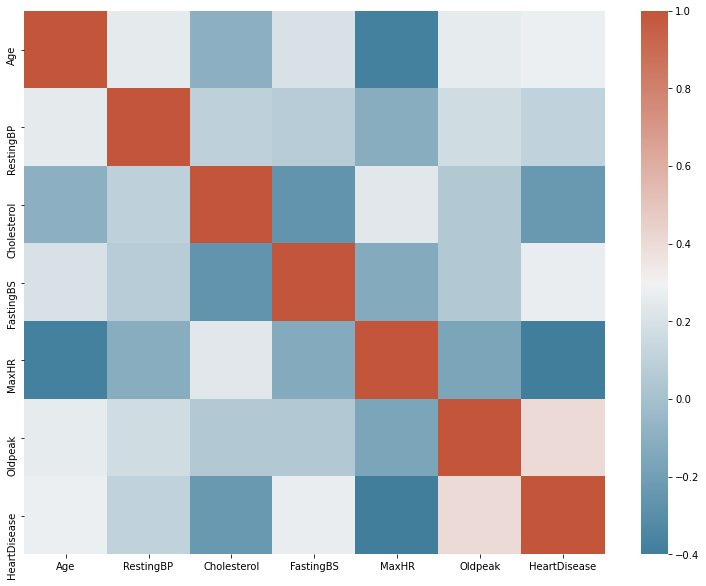

In [5]:
corelation = data.corr()
plt.figure(figsize=(13,10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corelation, cmap = cmap)

In [6]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
age_hearD = data[['Age', 'HeartDisease']]
age_hearD = age_hearD.sort_values(by='Age')
age_hearD['Cumulative_HD'] = age_hearD['HeartDisease'].cumsum()

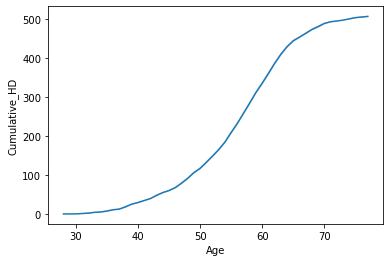

In [8]:
sns.lineplot(x = age_hearD['Age'], y = age_hearD['Cumulative_HD'])

In [9]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


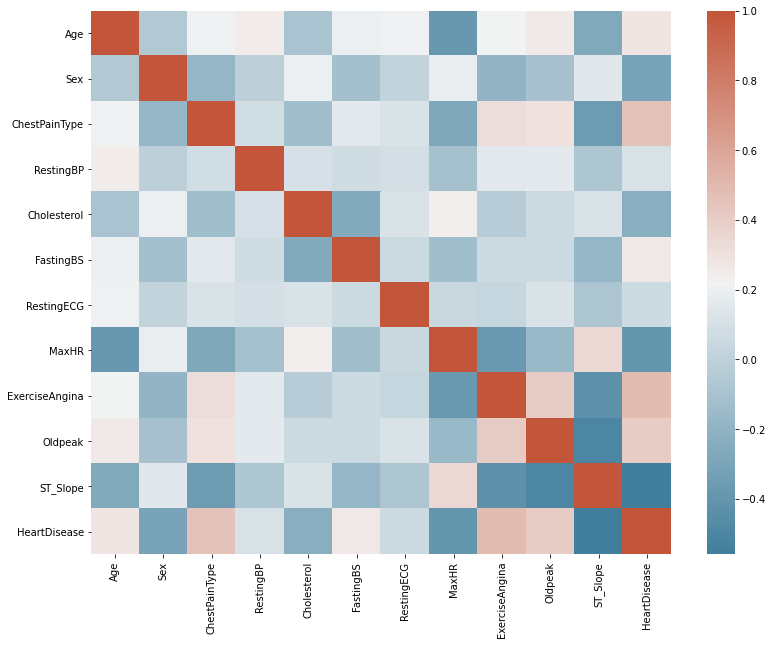

In [11]:
data['Sex'] = data['Sex'].replace(["M", "F"], [1, 2])
data["ChestPainType"] = data["ChestPainType"].replace(['ATA', 'NAP', 'ASY', 'TA'], [3, 4, 5, 6])
data["RestingECG"] = data['RestingECG'].replace(['Normal', 'ST', 'LVH'], [1, 2, 3])
data['ExerciseAngina'] = data['ExerciseAngina'].replace(['N', 'Y'], [0, 1])
data['ST_Slope'] = data['ST_Slope'].replace(['Up', 'Flat', 'Down'], [2, 1, 0])

corelation = data.corr()
plt.figure(figsize=(13,10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corelation, cmap = cmap)

In [12]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,3,140,289,0,1,172,0,0.0,2,0
1,49,2,4,160,180,0,1,156,0,1.0,1,1
2,37,1,3,130,283,0,2,98,0,0.0,2,0
3,48,2,5,138,214,0,1,108,1,1.5,1,1
4,54,1,4,150,195,0,1,122,0,0.0,2,0


In [35]:
X, y = data.drop(columns=['HeartDisease']), data['HeartDisease']

In [36]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
# val_x, test_x, val_y, test_y = train_test_split(test_x, test_y, test_size=0.1, shuffle = True, random_state=42)
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)
# val_x = sc.fit_transform(val_x)

In [37]:
print(data.shape)
print(train_x.shape)
print(test_x.shape)
print(val_x.shape)

(918, 12)
(734, 11)
(184, 11)
(248, 11)


In [38]:
randomForest = RandomForestClassifier(n_estimators=400, verbose=1)
randomForest.fit(train_x, train_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.4s finished


RandomForestClassifier(n_estimators=400, verbose=1)

In [39]:
y_pred = randomForest.predict(test_x)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished


In [40]:
randomForest.score(test_x, test_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished


0.8804347826086957

In [41]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

Mean Absolute Error: 0.11956521739130435
Mean Squared Error: 0.11956521739130435
Root Mean Squared Error: 0.3457820374040623


In [42]:
svc = SVC(kernel = "rbf", gamma = 0.01, C = 5)
svc.fit(train_x, train_y)
svc.score(test_x, test_y)

0.8641304347826086

In [43]:
y_pred = svc.predict(test_x)
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

Mean Absolute Error: 0.1358695652173913
Mean Squared Error: 0.1358695652173913
Root Mean Squared Error: 0.3686048903872428


In [44]:
log_r = LogisticRegression()
log_r.fit(train_x, train_y)
log_r.score(test_x, test_y)

0.8369565217391305

In [45]:
y_pred = log_r.predict(test_x)
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

Mean Absolute Error: 0.16304347826086957
Mean Squared Error: 0.16304347826086957
Root Mean Squared Error: 0.4037864265436241


In [46]:
cv = cross_val_score(randomForest, train_x, train_y, cv = 10)
print("Random Forest = ", cv.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Random Forest =  0.8663828211773417


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished


In [47]:
cv = cross_val_score(svc, train_x, train_y, cv = 5)
print("SVM = ", cv.mean())

SVM =  0.8665082471344702


In [48]:
cv = cross_val_score(log_r, train_x, train_y, cv = 5)
print("Logistic regression = ", cv.mean())

Logistic regression =  0.8501537601341906


In [49]:
train_x.shape

(734, 11)

In [50]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)
val_x, test_x, val_y, test_y = train_test_split(test_x, test_y, test_size=0.1, shuffle = True, random_state=42)
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)
val_x = sc.fit_transform(val_x)

In [51]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape = (11,)),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0

In [52]:
model.compile(optimizer='rmsprop', loss = tf.keras.losses.mean_squared_error, metrics=['accuracy'])

In [53]:
model.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=150)

Epoch 1/150
21/21 [==============================] - 2s 18ms/step - loss: 0.2374 - accuracy: 0.5467 - val_loss: 0.2046 - val_accuracy: 0.7379
Epoch 2/150
21/21 [==============================] - 0s 12ms/step - loss: 0.2143 - accuracy: 0.6433 - val_loss: 0.1849 - val_accuracy: 0.7984
Epoch 3/150
21/21 [==============================] - 0s 12ms/step - loss: 0.2034 - accuracy: 0.7134 - val_loss: 0.1612 - val_accuracy: 0.8065
Epoch 4/150
21/21 [==============================] - 0s 12ms/step - loss: 0.1708 - accuracy: 0.7850 - val_loss: 0.1424 - val_accuracy: 0.8306
Epoch 5/150
21/21 [==============================] - 0s 12ms/step - loss: 0.1582 - accuracy: 0.7882 - val_loss: 0.1279 - val_accuracy: 0.8427
Epoch 6/150
21/21 [==============================] - 0s 12ms/step - loss: 0.1494 - accuracy: 0.8053 - val_loss: 0.1191 - val_accuracy: 0.8468
Epoch 7/150
21/21 [==============================] - 0s 11ms/step - loss: 0.1447 - accuracy: 0.8069 - val_loss: 0.1148 - val_accuracy: 0.8468
Epoch 

In [54]:
model.evaluate(test_x, test_y)

1/1 [==============================] - 0s 21ms/step - loss: 0.0838 - accuracy: 0.8929


[0.08375198394060135, 0.8928571343421936]